<a href="https://colab.research.google.com/github/EdoardoMorucci/Plant-Leaves-Search-Engine---MIRCV/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connection to GDrive and download of all the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install -q kaggle

from google.colab import files
_ = files.upload()

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d davidedemarco/healthy-unhealthy-plants-dataset-segmented --unzip


 97% 625M/642M [00:03<00:00, 216MB/s]
100% 642M/642M [00:03<00:00, 192MB/s]


In [ ]:
# downaload the noise images from https://drive.google.com/file/d/1wsrC7u104hsAU6Wo0cII33TLC3oLpTkm/view?usp=sharing

! gdown --id 1wsrC7u104hsAU6Wo0cII33TLC3oLpTkm -O noise.zip

Downloading...
From: https://drive.google.com/uc?id=1wsrC7u104hsAU6Wo0cII33TLC3oLpTkm
To: /content/noise.zip
100% 3.08G/3.08G [00:53<00:00, 58.0MB/s]


In [ ]:
! unzip -qq /content/noise.zip

## Imports

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from tqdm.auto import tqdm

from IPython.display import display
from ipywidgets import HBox, Image, HTML

import tensorflow as tf
from tensorflow import keras

import numpy as np

from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# Creation of DataFrames for noise images and leaves images

In [ ]:
directories = ["Apple", "Blueberry", "Cherry", "Corn", "Grape", "Orange", "Peach", "Pepper", "Potato", "Raspberry", "Soybean", "Squash", "Strawberry", "Tomato"]
leaves_dataframe = pd.DataFrame(columns=['Image', 'Plant', 'Path'])
for plant in tqdm(directories):
  leaf_path = '/content/Healthy-Unhealthy-Plants-Dataset-Segmented/' + plant
  image_paths = listdir(leaf_path)
  for path in tqdm(image_paths):
    test = leaf_path + "/" + path
    leaves_dataframe = leaves_dataframe.append({'Image': path, 'Plant': plant, 'Path': test}, ignore_index=True)



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4159 [00:00<?, ?it/s]

  0%|          | 0/1969 [00:00<?, ?it/s]

  0%|          | 0/2489 [00:00<?, ?it/s]

  0%|          | 0/5058 [00:00<?, ?it/s]

  0%|          | 0/5521 [00:00<?, ?it/s]

  0%|          | 0/7255 [00:00<?, ?it/s]

  0%|          | 0/3634 [00:00<?, ?it/s]

  0%|          | 0/3240 [00:00<?, ?it/s]

  0%|          | 0/2868 [00:00<?, ?it/s]

  0%|          | 0/635 [00:00<?, ?it/s]

  0%|          | 0/6706 [00:00<?, ?it/s]

  0%|          | 0/2409 [00:00<?, ?it/s]

  0%|          | 0/2238 [00:00<?, ?it/s]

  0%|          | 0/23853 [00:00<?, ?it/s]

In [ ]:
leaves_dataframe



,Image,Plant,Path
0,ca66c694-e8cb-47df-84af-b4c46de1fd3e___RS_HL 7...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
1,00365.jpg,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
2,22570.jpg,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
3,0576bbc4-37b3-413c-8a35-4138c2da69a7___RS_HL 8...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
4,0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
...,...,...,...
72029,c0eb1cc5-185a-4f20-b8cd-a3943cd9588b___RS_Late...,Tomato,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
72030,42cdc8a5-8010-4486-8dcd-46fc67290412___YLCV_GC...,Tomato,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
72031,eb0b95d9-4012-494c-85b6-48f7e250c958___GH_HL L...,Tomato,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
72032,38346.jpg,Tomato,/content/Healthy-Unhealthy-Plants-Dataset-Segm...


In [ ]:
noise_path = "/content/mirflickr25k/mirflickr"
noise_images = [f for f in listdir(noise_path) if isfile(join(noise_path, f))]


In [ ]:
noise_dataframe = pd.DataFrame(columns=['Image', 'Plant', 'Path'])

for image_path in tqdm(noise_images):
  test = noise_path + "/" + image_path
  noise_dataframe = noise_dataframe.append({'Image': image_path, 'Plant': "noise", 'Path': test}, ignore_index=True)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
noise_dataframe

,Image,Plant,Path
0,im17539.jpg,noise,/content/mirflickr25k/mirflickr/im17539.jpg
1,im23428.jpg,noise,/content/mirflickr25k/mirflickr/im23428.jpg
2,im4767.jpg,noise,/content/mirflickr25k/mirflickr/im4767.jpg
3,im15986.jpg,noise,/content/mirflickr25k/mirflickr/im15986.jpg
4,im4775.jpg,noise,/content/mirflickr25k/mirflickr/im4775.jpg
...,...,...,...
24995,im22820.jpg,noise,/content/mirflickr25k/mirflickr/im22820.jpg
24996,im6500.jpg,noise,/content/mirflickr25k/mirflickr/im6500.jpg
24997,im10060.jpg,noise,/content/mirflickr25k/mirflickr/im10060.jpg
24998,im5074.jpg,noise,/content/mirflickr25k/mirflickr/im5074.jpg


In [ ]:
frames = [leaves_dataframe, noise_dataframe]

total_dataframe = pd.concat(frames, ignore_index=True)

total_dataframe

,Image,Plant,Path
0,ca66c694-e8cb-47df-84af-b4c46de1fd3e___RS_HL 7...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
1,00365.jpg,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
2,22570.jpg,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
3,0576bbc4-37b3-413c-8a35-4138c2da69a7___RS_HL 8...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
4,0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE...,Apple,/content/Healthy-Unhealthy-Plants-Dataset-Segm...
...,...,...,...
97029,im22820.jpg,noise,/content/mirflickr25k/mirflickr/im22820.jpg
97030,im6500.jpg,noise,/content/mirflickr25k/mirflickr/im6500.jpg
97031,im10060.jpg,noise,/content/mirflickr25k/mirflickr/im10060.jpg
97032,im5074.jpg,noise,/content/mirflickr25k/mirflickr/im5074.jpg


In [ ]:
total_dataframe.to_csv("dataframe1.csv")

In [ ]:
!mv /content/dataframe1.csv /content/gdrive/Shareddrives/MIRCV-PlantLeavesSearchEngine

# Feature Extraction

## Normal Model

In [ ]:
model = tf.keras.applications.densenet.DenseNet121(
    weights='imagenet', input_tensor=None, input_shape=(224,224,3), 
    pooling='avg', include_top=False
)

model.summary()

In [ ]:
noise_paths = noise_dataframe.Path + '/' + noise_dataframe.Image


noise_features = []

image_width = 224
image_height = 224
image_size = (image_height, image_width)

for path in tqdm(noise_paths):
  image_pil = tf.keras.utils.load_img(path, target_size=image_size, interpolation='bilinear')
  image_np = tf.keras.preprocessing.image.img_to_array(image_pil)
  image_np = np.expand_dims(image_np, axis=0)  # add batch dimension
  image_feature_vector = model(image_np).numpy()
  noise_features.append(image_feature_vector)

noise_features = np.concatenate(noise_features, axis=0)

np.savez("noise_features_final.npz", noise_features)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
image_paths = "/content/Healthy-Unhealthy-Plants-Dataset-Segmented/" + leaves_dataframe.Plant + '/' + leaves_dataframe.Image


features = []

image_width = 224
image_height = 224
image_size = (image_height, image_width)

for path in tqdm(image_paths):
  image_pil = tf.keras.utils.load_img(path, target_size=image_size, interpolation='bilinear')
  image_np = tf.keras.preprocessing.image.img_to_array(image_pil)
  image_np = np.expand_dims(image_np, axis=0)  # add batch dimension
  image_feature_vector = model(image_np).numpy()
  features.append(image_feature_vector)

features = np.concatenate(features, axis=0)
np.savez("features_final.npz", features)

  0%|          | 0/72034 [00:00<?, ?it/s]

Concatenate the two features vector and save it to drive

In [ ]:
# feature https://drive.google.com/file/d/1MClSLlPJ4iAuYugiXuPa8z3MEDwR79SK/view?usp=sharing
# noise feature https://drive.google.com/file/d/1_T3vAVOgSMp9UxUhYuIp28AnDIngQO9d/view?usp=sharing
! gdown --id 1MClSLlPJ4iAuYugiXuPa8z3MEDwR79SK

a = np.load('features_final.npz')

features = a['arr_0']

!gdown --id 1_T3vAVOgSMp9UxUhYuIp28AnDIngQO9d

b = np.load('noise_features_final.npz')

noise_features = b['arr_0']


Downloading...
From: https://drive.google.com/uc?id=1MClSLlPJ4iAuYugiXuPa8z3MEDwR79SK
To: /content/features_final.npz
100% 295M/295M [00:02<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_T3vAVOgSMp9UxUhYuIp28AnDIngQO9d
To: /content/noise_features_final.npz
100% 102M/102M [00:00<00:00, 143MB/s]  


In [ ]:
total_features = np.concatenate((features, noise_features), axis=0)
np.save("total_features.npy", total_features)


## Finetuned Model

In [ ]:
finetuned_model = keras.models.load_model('/content/gdrive/Shareddrives/MIRCV-PlantLeavesSearchEngine/model_fine_tuned')
fixed_finetuned_model = keras.models.Model(inputs=finetuned_model.input, outputs=finetuned_model.get_layer('gap').output)
fixed_finetuned_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
noise_paths = noise_dataframe.Path 


noise_features = []

image_width = 224
image_height = 224
image_size = (image_height, image_width)

for path in tqdm(noise_paths):
  image_pil = tf.keras.utils.load_img(path, target_size=image_size, interpolation='bilinear')
  image_np = tf.keras.preprocessing.image.img_to_array(image_pil)
  image_np = np.expand_dims(image_np, axis=0)  # add batch dimension
  image_feature_vector = fixed_finetuned_model(image_np).numpy()
  noise_features.append(image_feature_vector)

noise_features = np.concatenate(noise_features, axis=0)


np.savez("noise_features_finetuned_t.npz", noise_features)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
! mv /content/noise_features_finetuned_t.npz /content/gdrive/Shareddrives/MIRCV-PlantLeavesSearchEngine

In [ ]:
leaves_dataframe = pd.read_csv('/content/gdrive/Shareddrives/MIRCV-PlantLeavesSearchEngine/dataframe1.csv')

In [ ]:
image_paths = leaves_dataframe.Path
image_paths = image_paths[:72034]

features = []

image_width = 224
image_height = 224
image_size = (image_height, image_width)

for path in tqdm(image_paths):
  image_pil = tf.keras.utils.load_img(path, target_size=image_size, interpolation='bilinear')
  image_np = tf.keras.preprocessing.image.img_to_array(image_pil)
  image_np = np.expand_dims(image_np, axis=0)  # add batch dimension
  image_feature_vector = fixed_finetuned_model(image_np).numpy()
  features.append(image_feature_vector)


features = np.concatenate(features, axis=0)
np.savez("features_fine_tuned_t.npz", features)

  0%|          | 0/72034 [00:00<?, ?it/s]

In [ ]:
! mv /content/features_fine_tuned_t.npz /content/gdrive/Shareddrives/MIRCV-PlantLeavesSearchEngine

Concatenate the two features vector and save it to drive

In [ ]:
# Finetuned feature https://drive.google.com/file/d/154NTeCkSUPE1tlI6Z-mM8BZ9om5hnzMp/view?usp=sharing
# Finetuned noise feature https://drive.google.com/file/d/1om-VfqmNK1-5v6M06C0LSOOWzUpB2n4G/view?usp=sharing
! gdown --id 154NTeCkSUPE1tlI6Z-mM8BZ9om5hnzMp

a = np.load('features_fine_tuned.npz')

features = a['arr_0']

!gdown --id 1om-VfqmNK1-5v6M06C0LSOOWzUpB2n4G

b = np.load('noise_features_finetuned.npz')

noise_features = b['arr_0']

Downloading...
From: https://drive.google.com/uc?id=154NTeCkSUPE1tlI6Z-mM8BZ9om5hnzMp
To: /content/features_fine_tuned.npz
100% 295M/295M [00:03<00:00, 89.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1om-VfqmNK1-5v6M06C0LSOOWzUpB2n4G
To: /content/noise_features_finetuned.npz
100% 102M/102M [00:00<00:00, 111MB/s]  


In [ ]:
total_features = np.concatenate((features, noise_features), axis=0)

np.save("finetuned_features.npy", total_features)

In [ ]:
total_features[0]

array([2.4198984e-05, 1.3311758e-03, 6.6800527e-03, ..., 0.0000000e+00,
       0.0000000e+00, 9.3123986e-04], dtype=float32)

tf.Tensor([[0.0001167  0.00131612 0.00189398 ... 0.         0.         0.00220551]], shape=(1, 1024), dtype=float32)


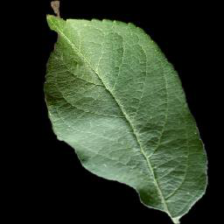

In [ ]:
query_features = extract_features(total_dataframe.Path.iloc[0], fixed_finetuned_model)
print(query_features)

query_image_pil = tf.keras.utils.load_img(total_dataframe.Path.iloc[0], target_size=(224,224), interpolation='bilinear')
query_image_pil

In [ ]:
def extract_features(query_path, model):
  image_width = 224
  image_height = 224
  image_size = (image_height, image_width)
  query_image_pil = tf.keras.utils.load_img(query_path, target_size=image_size, interpolation='bilinear')
  query_image_np = tf.keras.preprocessing.image.img_to_array(query_image_pil)
  query_image_np = np.expand_dims(query_image_np, axis=0)  # add batch dimension
  query_features = model(query_image_np)
  return query_features